In [1]:
import os

In [2]:
data_dir = 'D:\Python\TF_Udemy\DATA\cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

In [5]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [6]:
test_path

'D:\\Python\\TF_Udemy\\DATA\\cell_images\\test\\'

In [7]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(test_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [9]:
para_cell = test_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [10]:
imread(para_cell).shape

(136, 133, 3)

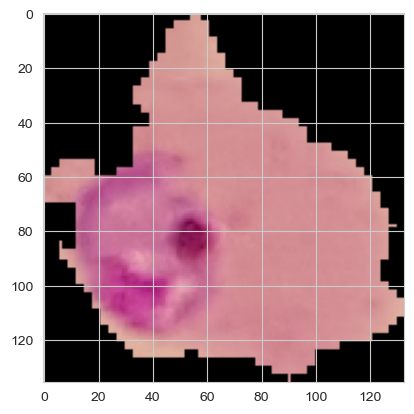

In [11]:
plt.imshow(imread(para_cell))

In [12]:
os.listdir(train_path+'uninfected')[3]

'C100P61ThinF_IMG_20150918_144104_cell_21.png'

In [13]:
uninfected_cell = train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_21.png'

In [14]:
unifected_cell = imread(uninfected_cell)

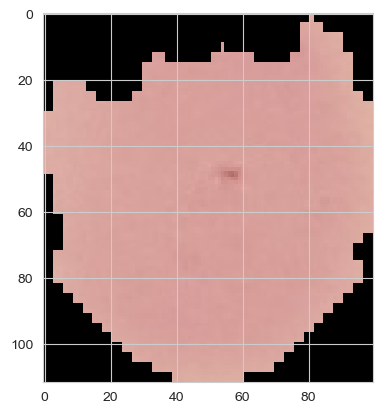

In [15]:
plt.imshow(unifected_cell)

In [16]:
len(os.listdir(train_path+'parasitized'))

12480

In [17]:
len(os.listdir(train_path+'uninfected'))

12480

In [18]:
len(os.listdir(test_path+'parasitized'))

1300

In [19]:
len(os.listdir(test_path+'uninfected'))

1300

# Working with diamentions

In [20]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [21]:
dim1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


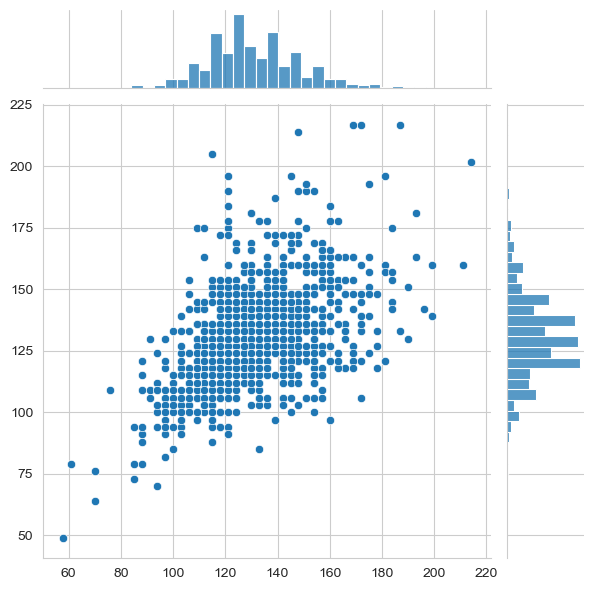

In [22]:
sns.jointplot(x=dim1,y=dim2)

In [23]:
np.mean(dim1)

130.92538461538462

In [24]:
np.mean(dim2)

130.75

In [25]:
image_shape = (130,130,3)

# Preprocessing

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

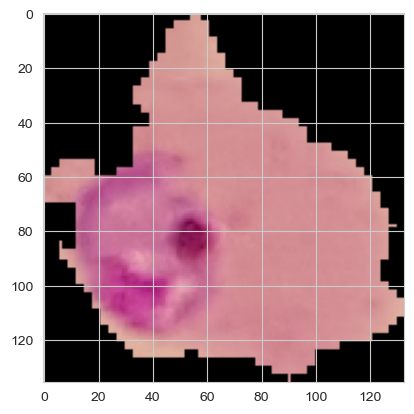

In [28]:
para_img = imread(para_cell)
plt.imshow(para_img)

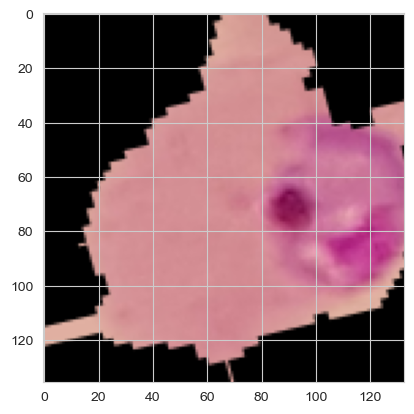

In [29]:
plt.imshow(image_gen.random_transform(para_img))

In [30]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [31]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Creating a modell

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [33]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

# Training the model

In [37]:
batch_size=16

In [38]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [39]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [40]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [41]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                              callbacks=[early_stop])

C:\Users\olegb\AppData\Local\Temp\ipykernel_5336\500581117.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,epochs=20,


Epoch 1/20
1560/1560 [==============================] - 281s 180ms/step - loss: 0.8025 - accuracy: 0.5470 - val_loss: 0.6754 - val_accuracy: 0.5881
Epoch 2/20
1560/1560 [==============================] - 176s 113ms/step - loss: 0.6813 - accuracy: 0.5756 - val_loss: 0.6753 - val_accuracy: 0.5869
Epoch 3/20
1560/1560 [==============================] - 176s 113ms/step - loss: 0.6735 - accuracy: 0.5906 - val_loss: 0.6707 - val_accuracy: 0.5900
Epoch 4/20
1560/1560 [==============================] - 176s 113ms/step - loss: 0.6681 - accuracy: 0.6004 - val_loss: 0.6749 - val_accuracy: 0.5942
Epoch 5/20
1560/1560 [==============================] - 175s 112ms/step - loss: 0.6851 - accuracy: 0.5966 - val_loss: 0.6675 - val_accuracy: 0.6012
Epoch 6/20
1560/1560 [==============================] - 176s 113ms/step - loss: 0.6672 - accuracy: 0.6013 - val_loss: 0.6677 - val_accuracy: 0.6142
Epoch 7/20
1560/1560 [==============================] - 176s 113ms/step - loss: 0.4762 - accuracy: 0.7790 - val_

In [43]:
losses = pd.DataFrame(model.history.history)

<Axes: >

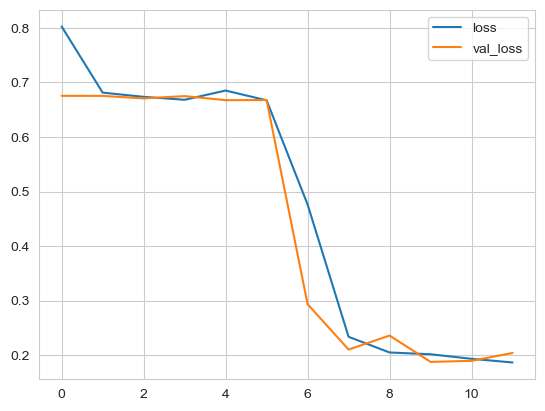

In [44]:
losses[['loss','val_loss']].plot()

In [45]:
model.evaluate_generator(test_image_gen)

C:\Users\olegb\AppData\Local\Temp\ipykernel_5336\1932836239.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[0.20523560047149658, 0.9311538338661194]

# Evaluating the model

In [47]:
pred = model.predict_generator(test_image_gen)

C:\Users\olegb\AppData\Local\Temp\ipykernel_5336\511821881.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_image_gen)


In [48]:
pred

array([[1.4190604e-03],
       [6.7361415e-04],
       [1.8618770e-03],
       ...,
       [9.2167580e-01],
       [9.6738309e-01],
       [9.5065826e-01]], dtype=float32)

In [49]:
predictions = pred > 0.5

In [50]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1300
           1       0.89      0.98      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600


In [54]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1149,  151],
       [  29, 1271]], dtype=int64)

In [55]:
para_cell

'D:\\Python\\TF_Udemy\\DATA\\cell_images\\test\\parasitized\\C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [56]:
from tensorflow.keras.preprocessing import image

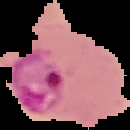

In [57]:
my_image = image.load_img(para_cell, target_size=image_shape)
my_image

In [58]:
my_image_arr = image.img_to_array(my_image)

In [59]:
my_image_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [61]:
my_image_arr.shape # needed (1,130,130,3)

(130, 130, 3)

In [64]:
my_image_arr = np.expand_dims(my_image_arr,axis=0)

In [65]:
my_image_arr.shape

(1, 130, 130, 3)

In [66]:
model.predict(my_image_arr)

1/1 [==============================] - 0s 65ms/step


array([[0.01190398]], dtype=float32)

In [67]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
# correct prediction